In [99]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Let's check out our distribuition of the target label in our training data(non COVID hate speech tweets)
training_df = pd.read_csv("../data/tweet_hate_train.csv")
training_df.shape

(31000, 2)

In [100]:
# For non-COVID domain
# Set up the shape of the wordcloud
bird_mask =np.array(Image.open("twitte_bird.png"))
# Extract tweets with label = 0 and 1
non_hate_tweets_rows = training_df[training_df.label == 0].preprocessed
non_hate_tweets =  ' '.join(str(tweet) for tweet in non_hate_tweets_rows)
hate_tweets_rows = training_df[training_df.label == 1].preprocessed
hate_tweets = ' '.join(str(tweet) for tweet in hate_tweets_rows)
# Set up wordcloud
wordcloud_non_hate = WordCloud(width = 800, height = 800,background_color="white", mask = bird_mask, contour_color = "firebrick").generate(non_hate_tweets)
wordcloud_hate = WordCloud(width = 800, height = 800,background_color="black", scale = 2,mask = bird_mask, contour_color = "black").generate(hate_tweets)



In [74]:
# Do the same for COVID domain
COVID_df_train = pd.read_csv("../data/COVID_500_train.csv")
COVID_df_dev = pd.read_csv("../data/COVID_200_dev.csv")
COVID_df_test = pd.read_csv("../data/COVID_300_test.csv")
frames = [COVID_df_train,COVID_df_dev,COVID_df_test]
COVID_df = pd.concat(frames)
# Extract tweets with label = 0 and 1
COVID_non_hate_rows = COVID_df[COVID_df.label == 0].preprocessed_tweets
COVID_hate_rows = COVID_df[COVID_df.label == 1].preprocessed_tweets
COVID_tweets_hate = ' '.join(str(tweet) for tweet in COVID_hate_rows)
COVID_tweets_non_hate = ' '.join(str(tweet) for tweet in COVID_non_hate_rows)
# Set up wordcloud
wordcloud_COVID_hate = WordCloud(width = 800, height = 800,background_color="black", scale = 2,mask = bird_mask, contour_color = "black").generate(COVID_tweets_hate)
wordcloud_COVID_non_hate = WordCloud(width = 800, height = 800,background_color="white", scale = 2,mask = bird_mask, contour_color = "black").generate(COVID_tweets_non_hate)

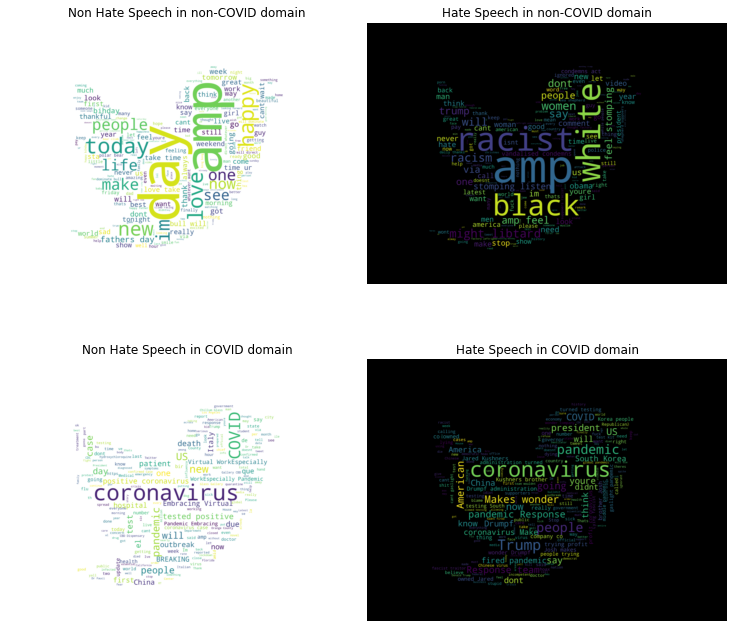

In [115]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), squeeze = True)
# fig.suptitle("Non Hate Speech vs. Hate Speech Tweets in non-COVID-19 domain and COVID-19 domain \n(from left to right, top to buttom)", fontsize = 14)

ax1.imshow(wordcloud_non_hate, interpolation = "bilinear")
ax1.axis("off")
ax1.set_title('Non Hate Speech in non-COVID domain')
ax2.imshow(wordcloud_hate, interpolation = "bilinear")
ax2.axis("off")
ax2.set_title('Hate Speech in non-COVID domain')
ax3.imshow(wordcloud_COVID_non_hate, interpolation = "bilinear")
ax3.axis("off")
ax3.set_title('Non Hate Speech in COVID domain')
ax4.imshow(wordcloud_COVID_hate, interpolation = "bilinear")
ax4.axis("off")
ax4.set_title('Hate Speech in COVID domain')
for ax in fig.get_axes():
    ax.label_outer()
plt.tight_layout(pad = 0.01)

In [116]:
# Save plot
fig.savefig("../image/wordcloud.png")
